In [1]:
import matplotlib.pyplot as plt
import torch
import os
os.chdir("/work/bbd0953/DDPM")  # Change root dir to project folder
from torchvision.transforms import ToTensor, Compose, CenterCrop
from torch.utils.data import DataLoader

from firstgalaxydata import FIRSTGalaxyData as FGD
from unet import Unet

In [3]:
os.getcwd()

'/work/bbd0953/DDPM'

In [2]:
img_size = 128
transform = Compose([
    ToTensor(),
    CenterCrop(img_size),
    lambda x: x * 2 - 1,  # Scale to [-1, 1]
])

reverse_transform = lambda x: (x + 1) / 2

data = FGD(root="./", transform=transform, selected_split="train")

/work/bbd0953/DDPM/model/firstgalaxydata.py:178: UserWarning: Could not find masking parameters, only available for LOFAR data. mask_param will be None.
  warnings.warn("Could not find masking parameters, only available for LOFAR data. "


In [8]:
show = lambda img: plt.colorbar(plt.imshow(img.squeeze()))

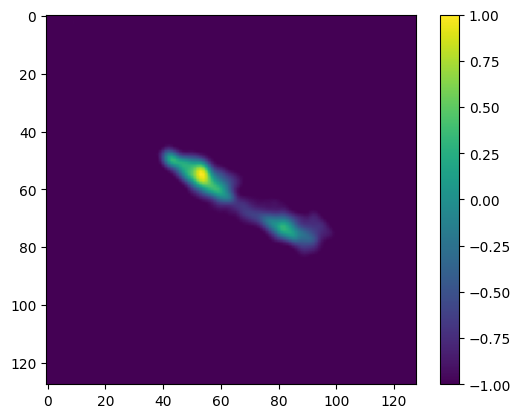

In [9]:
img, label = data[1296]  # This one is pretty
show(img)
img.shape

x_start = img.unsqueeze(0)

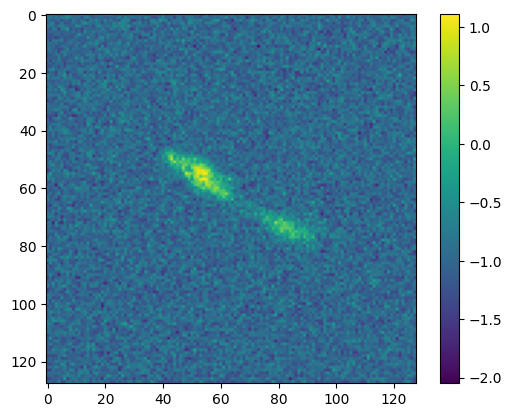

In [21]:
from model.diffusion import q_sample

noisy = q_sample(x_start, torch.tensor([40]))
show(noisy)


In [40]:
dataloader = DataLoader(data, batch_size=8, shuffle=True)
len(dataloader)

220

In [21]:
batch = next(iter(dataloader))
batch[0].shape

torch.Size([16, 1, 128, 128])

In [9]:
model = Unet(dim=128, channels=1, dim_mults=(1, 2, 4,))

In [18]:
total_params = sum(p.numel() for p in model.parameters())
total_params

38547457

In [23]:
def num_to_groups(num, divisor):
    groups = num // divisor
    remainder = num % divisor
    arr = [divisor] * groups
    if remainder > 0:
        arr.append(remainder)
    return arr

In [1]:
from datetime import datetime
import time
import sys
t0 = datetime.now()
dt = lambda: datetime.now() - t0

print(t0.strftime("%H:%M:%S"))
time.sleep(2)
print(dt())

16:38:16
0:00:02.002956


In [12]:
(
    10 
    / 2
)

5.0